**Zadanie (nie zrobiliśmy tego na zajęciach)**

Napisz funkcję `isNiven`, która będzie sprawdzała, czy podana liczba jest naturalna (skorzystaj ze stworzonej funkcji `isValid`), a następnie czy jest liczbą Nivena. Jeśli oba warunki są spełnione zwróć wartość `True`, w przeciwnym wypadku zwróć wartość `False`. Liczby Nivena to liczby, które dzielą się przez sumę swoich cyfr.<br> 
Przykład:<br>
isNiven(28) -> False <br>
isNiven(63) -> True <br>
isNiven() -> False <br>

Następnie użyj tej funkcji do znalezienia wszyskich liczb nivena w przedziale [1, 100].

**Rozwiązanie:**

In [2]:
def isNiven(x):
    x = str(x)
    if isValid(x) and x != '0':
        if int(x) % sum([int(l) for l in x]) == 0:
            return True
    else:
        return False

In [146]:
isNiven(0)

False

Pytanie brzmi, po co takie funkcje zwracające wartości `True` albo `False` istnieją? Są wygodne w użyciu na przykład przy listach składanych lub w pętlach.

In [3]:
print(*[x for x in range(1, 101, 1) if isNiven(x)])

1 2 3 4 5 6 7 8 9 10 12 18 20 21 24 27 30 36 40 42 45 48 50 54 60 63 70 72 80 81 84 90 100


**Zadanie - całkowanie numeryczne metodą prostokątów**

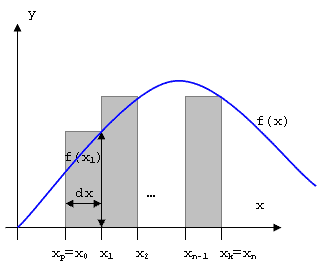

Całkę, czyli pole pod zadaną krzywą $f(x)$ na przedziale $[a, b]$ możemy w sposób przybliżony obliczyć za pomocą sumowania pól prostokątów pod funkcją. Szerokość prostokąta $\Delta x$ ustalamy za pomocą określenia liczby prostokątów $N$, których chemy użyć zgodnie ze wzorem $\Delta x = \frac{b - a}{N}$. Im większa liczba $N$ tym lepsza dokładność, ale też i dłuższy czas obliczeń. Mając ustalony krok $\Delta x$ dzielimy oś $x$ na dyskretne punkty $[x_0, x_1, x_2, ..., x_N]$, gdzie $x_0 = a$, $x_i = a + i\Delta x$ i oczywiście $x_N = a+N\Delta x = b$. Następnie, dla każdego prostokąta jego wysokość ustalamy jako wartość funkcji dla argumentu będącego jego prawym brzegiem. Innymi słowami, wysokość $i$-tego prostokąta (będącego na przedziale $[x_{i-1}, x_i]$) określamy jako $f(x_i)$ (patrz rysunek wyżej).<br>
Wreszcie przybliżona wartość będzie wyrażona jako suma<br>
$\int^b_a f(x) dx \approx \sum^N_1 f(a + i\Delta x)\Delta x$.

Napisz program, który będzie obliczał całkę z funkcji kwadratowej $f(x)=3x^2-4x-5$ przedstawioną metodą. Skorzystaj ze struktury przedstawionej poniżej:

In [24]:
def funkcja(x):
    '''Funkcja zwracająca wartość funkcji dla podanej wartości x'''

def calkaProstokaty(a, b, N):
    '''Funkcja zwracająca całkę z funkcji zdefiniowanej wyżej na przdziale a, b i z liczbą prostokątów równą N.
    Należy zwracać uwagę, czy a < b czy na odwrót i odpowiednio dostosować obliczenia'''
    
wynik = calkaProstokaty(1, 4, 1000) #wywołanie funkcji całkującej dla przedziału [1, 4]
print(wynik) #wyświetlenie wyniku

None


**Rozwiązanie:**

In [2]:
def funkcja(x): 
    return 3 * x ** 2 - 4 * x - 5

def calkaProstokaty(a, b, N):
    Dx = (b - a) / N #określamy szerokość prostokąta
    return sum([funkcja(a + i * Dx) * Dx for i in range(1, N + 1, 1)]) #wykonujemy sumowanie
    
wynik = calkaProstokaty(1, 4, 1000) #wywołanie funkcji całkującej     
print(wynik) #wyświetlenie wyniku

18.04951350000001


Możemy także przedstawić wynik sprawdzając jak zwiększa się dokładność wraz ze zwiększaniem wartości $N$.

In [3]:
print(*[calkaProstokaty(1, 4, N) for N in [100, 1000, 10000, 100000]])

18.496349999999996 18.04951350000001 18.004950135 18.000495001350032


Ponieważ funkcja kwadratowa jest łatwa do scałkowania analitycznie, możemy porównać otrzymany wynik z wynikiem dokładnym, gdyż $\int 3x^2−4x-5 dx = x^3 - 2x^2 -5x +C = F(x)$. Stąd $\int^b_a = F(b) - F(a)$.

In [4]:
def calkaAnalityczna(a, b):
    def F(x): 
        return x ** 3 - 2 * x ** 2 - 5 * x #nie mamy stałej C, ponieważ przy odejmowaniu zostanie zredukowana
    return F(b) - F(a)
    
real = calkaAnalityczna(1, 4)
print(real)

18


W prosty sposób możemy także uogólnić naszą funkcję `calkaProstokaty` poprzez dołożenie argumentu `f` będącego funkcją. W ten sposób, jeśli stworzymy inną funkcją, będziemy mogli policzyć całkę bez modyfikowania kodu funkcji `calkaProstokaty`. Przykładowo, poniżej mamy zdefiniowane trzy różne funkcje i chcemy policzyć z nich całki za pomocą jednej funkcji `calkaProstokaty`.

In [5]:
def f1(x):
    return x
    
def f2(x):
    return x ** 2 
    
def f3(x):    
    return x ** 3
    
def calkaProstokaty(f, a, b, N): #poza przedziałem i liczą prostokontów f jest zmienną zawierającą funkcję
    Dx = (b - a) / N #określamy szerokość prostokąta
    return sum([f(a + i * Dx) * Dx for i in range(1, N + 1, 1)]) #wykonujemy sumowanie i wywołujemy podaną funkcję f

print(calkaProstokaty(f1, 0, 1, 1000)) #powinno być 0.5
print(calkaProstokaty(f2, 0, 1, 1000)) #powinno być 0.(3)
print(calkaProstokaty(f3, 0, 1, 1000)) #powinno byc 0.25

0.5005000000000002
0.33383350000000034
0.2505002499999998


**Uwaga!** Tak zaimplementowany kod działa również dla przedziału gdzie $a > b$, czy jest zrozumiałe dlaczego?

**Zadanie - całkowanie numeryczne metodą trapezów**

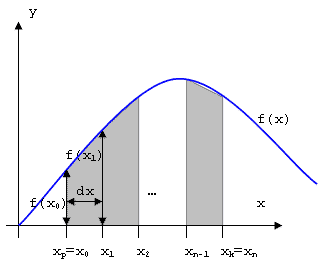

Zwykle nieco dokładniejsze wartość otrzymamy, jeśli zamiast prostokątów skorzystamy z trapezów prostokątnych jak na powyższym rysunku. Zamiast ustalać więc wysokość prostokąta na podstawie tylko jednego (skrajnego) punktu, możemy skorzystać z informacji o obu punktach. Tak więc dla $i$-tego trapezu jego podstawy będą miały wartości $f(x_{i-1})$ oraz $f(x_i)$, a jego pole $\frac{1}{2}(f(x_{i-1})+f(x_i))\Delta x$.<br>
Przybliżona wartość będzie w tym przypadku wyrażona jako suma<br>
$\int^b_a f(x) dx \approx \sum^N_1 \frac{1}{2}(f(a + (i-1)\Delta x)+f(a + i\Delta x))\Delta x$.

Napisz funkcję, która podobnie do zaimplementowanej jako ostatnia funkcji `calkaProstokaty` dla podanej funkcji, przedziału i liczby kroków zwróci wartość całki na tym przedziale. Do sprawdzenia obliczeń oraz porównania można skorzystać z zaimplementowanych już funkcji `funkcja` oraz `calkaAnalityczna`.

In [31]:
def calkaTrapezy(f, a, b, N):
    '''Funkcja licząca całkę z podanej funkcji f na przedziale [a, b] o liczbie kroków N metodą trapezów'''
    
wynik = calkaTrapezy(funkcja, 1, 4, 1000) #wywołanie funkcji całkującej dla przedziału [1, 4]
print(wynik) #wyświetlenie wyniku    

None


**Rozwiązanie:**

In [6]:
def calkaTrapezy(f, a, b, N):
    Dx = (b - a) / N #określamy szerokość prostokąta
    #wykonujemy sumowanie i wywołujemy podaną funkcję f
    return sum([0.5 * (f(a + (i - 1) * Dx) + f(a + i * Dx)) * Dx for i in range(1, N + 1, 1)]) 
    
wynik = calkaTrapezy(funkcja, 1, 4, 1000) #wywołanie funkcji całkującej dla przedziału [1, 4]
print(wynik) #wyświetlenie wyniku

18.000013500000005


Możemy porównać nasze wyniki z wynikami dla całkowania za pomocą prostokątów w zależności od wartości $N$.

In [7]:
print(*[calkaProstokaty(funkcja, 1, 4, N) for N in [100, 1000, 10000, 100000]])
print(*[calkaTrapezy(funkcja, 1, 4, N) for N in [100, 1000, 10000, 100000]])

18.496349999999996 18.04951350000001 18.004950135 18.000495001350032
18.001349999999995 18.000013500000005 18.00000013500002 18.00000000135003


Widać wyraźnie, że całkowanie ze pomocą trapezów w tym przypadku daje znacznie lepsze rezultaty.

**Zadanie - całkowanie numeryczne metodą losową (Monte Carlo)**

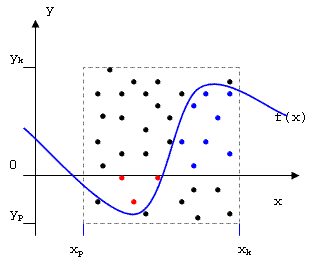

Metoda Monte Carlo jest zupełnie inna od tego, co robiliśmy do tej pory. Zasada działania jest bardzo prosta. Jeżeli chcemy obliczyć całkę z funkcji $f(x)$ na danym przedziale $[a, b]$ tworzymy prostokąt na tym przedziale tak, żeby zawierał w sobie całą funkcję, jak na rysunku powyżej. Pole takiego prostokąta wynosi $P = (b-a)*(d - c)$, gdzie $c$ oraz $d$ określają jego granice na osi $y$ i $c<d$. Tworzymy zmienną pomocniczą $S = 0$. Następnie, losujemy $N$ punktów $(x_p, y_p)$ w tym prostokącie, takich że $a \le x_p \le b$ oraz $c \le y_p \le d$. Następnie, sprawdzamy czy dany punkt znajduje się pod krzywą na dodatnich wartościach: $0 < y_p \le f(x_p)$ lub na ujemnych: $f(x_p) \le y_p < 0$. Jeśli spełniony jest pierwszy warunek zwiększamy $S$ o jeden, jeśli spełniony jest drugi warunek zmniejszamy $S$ o jeden.<br>
Całkę określamy poprzez stosunek $S$ do $N$ przemnożony przez pole prostokąta<br>
$\int^b_af(x)dx \approx P *\frac{S}{N}=(b-a)*(d - c)*\frac{S}{N}$.

In [75]:
from random import random as rnd

def losowyPunkt(x_min, x_max, y_min, y_max):
    '''Funkcja zwracająca losowy punkt o współrzędnych (x, y) takich, że x_min <= x < x_max, y_min <= y <= y_max'''

def calkaMC(f, x_min, x_max, y_min, y_max, N):
    '''Funkcja zwracająca wartość całki metodą Monte Carlo na przedziale x_min, x_max z funkcji f 
        dla N wylosowanych punktów.'''

wynik = calkaMC(funkcja, 1, 4, -8, 50, 1000) #wywołanie funkcji
print(wynik) #wyświetlenie wyniku

None


**Rozwiązanie:**

In [8]:
from random import random

def losowyPunkt(x_min, x_max, y_min, y_max):
    #funkcja random() zwraca losową wartość z przedziału [0, 1].
    #W celu otrzymania losowych wartości z przedziałów [a, b] oraz [c, d] musimy wynik przeskalować jak poniżej.
    return (x_min + (x_max - x_min) * random(), y_min + (y_max - y_min) * random()) 

def calkaMC(f, a, b, c, d, N):
    S = 0
    for i in range(N):
        p = losowyPunkt(a, b, c, d)
        if 0 < p[1] <= f(p[0]):
            S += 1
        elif f(p[0]) <= p[1] < 0:
            S -= 1
        else:
            pass
    return (b - a) * (d - c) * S / N

#jak narysujemy sobie wykres widać, że wartości są w przedziale (-8, 50) dla przedziału całkowania [1, 4]
wynik = calkaMC(funkcja, 1, 4, -8, 50, 1000) 
print(wynik)

17.4


In [9]:
print(*[calkaMC(funkcja, 1, 4, -10, 100, N) for N in [100, 1000, 10000, 100000, 1000000]])

23.1 17.16 18.711 17.9025 17.97741


Jak widać metoda ta jest znacznie mniej dokładna a wynik jest obliczany na podstawie losowania, więc za każdym wywołaniem funkcji jest inny.

**Zadanie domowe!**

Napisz prostą grę w zgadywanie liczby. Gra polega na wylosowaniu przez program dowolnej liczby czterocyfrowej z przedziału [1000, 9999]. Zadaniem gracza jest odgadnięcie tej liczby poprzez wpisanie jej. Po wpisaniu liczby przez gracza program może działać w dwóch wersjach:<br>
1. Wersja prostsza.<br>
Program podświetla na zielono wszystkie cyfry, które zostały wpisane na prawidłowych miejscach, a reszta cyfr zostaje wyświetlona bez zmian.<br>
<br>
Przykład działania:<br>
Wprowadź liczbę: $1111$<br>
$1111$<br>
Wprowadź liczbę: $2222$<br>
$2222$<br>
Wprowadź liczbę: $3333$<br>
$3333$<br>
Wprowadź liczbę: $4444$<br>
$444{\color{green}{4}}$<br>
Wprowadź liczbę: $5555$<br>
$5555$<br>
Wprowadź liczbę: $6666$<br>
$66{\color{green}{6}}6$<br>
Wprowadź liczbę: $7777$<br>
${\color{green}{77}}77$<br>
Wprowadź liczbę: $7764$<br>
${\color{green}{7764}}$<br>
<br>
2. Wersja trudniejsza:<br>
Program podświetla na zielono liczby tak jak w punkcie 1. ale dodatkowo podświetla na żółto/ pomarańczowo liczby, które znajdują się w rozwiązaniu, ale są na złej pozycji.<br>
<br>
Przykład działania:<br>
Wprowadź liczbę: $1234$<br>
${\color{green}{1}}2{\color{orange}{3}}4$<br>
Wprowadź liczbę: $5678$<br>
${\color{orange}{5}}678$<br>
Wprowadź liczbę: $9033$<br>
${\color{orange}{9}}0{\color{orange}{3}}3$<br>
Wprowadź liczbę: $1593$<br>
${\color{green}{1}}{\color{orange}{5}}{\color{green}{9}}{\color{orange}{3}}$<br>
Wprowadź liczbę: $1395$<br>
${\color{green}{1395}}$<br>
<br>
Zwróć uwagę, że w przypadku gdy podana była liczba $9033$ tylko jedna cyfra $3$ została podświetlona, bo tylko jedna znajdowała się w rozwiązaniu!

Do kolorowania teksu przyda się biblioteka `termcolor`, a dokładnie jej funkcja `colored`. Przykład działania został zaprezentowany poniżej.

In [14]:
from termcolor import colored

print(colored('Ala', 'red'), colored('ma', 'yellow'), colored('kota', 'green'))

Ala ma kota


Dodatkowo, program ma sprawdzać, czy dane podane przez użytkownika rzeczywiście są czterocyfrową liczbą z przedziału [1000, 9999]. Jeśli nie, ma zostać wyświetlony komunikat `Podane wyrażenie jest nieprawidłowe!` po czym program ma działać dalej normalnie i prosić o wprowadzenie liczby.

W celu ułatwienia zadania polecam skorzystać z podanego poniżej szkieletu programu zawierającego proponowany sposób rozwiązania za pomocą funkcji.

In [ ]:
from random import randint #funkcja randint(a, b) zwraca losową liczbę całkowitą z przedziału [a, b]
from termcolor import colored #funkcja colored(tekst, kolor) zwraca tekst o podanym kolorze (w funkcji print!)

def generateNumber():
    '''Funkcja losująca liczbę z przedziału [1000, 9999]. Zwraca wartość w typie ciągu znaków (str).'''

def isWin(user, goal):
    '''Funkcja sprawdzająca czy liczba podana przez użytkownika (user) jest taka sama jak liczba,
    która ma zostać zgadnięta (goal). Jeśli tak, zwróć True, jeśli nie, zwróć False.'''

def isCorrect(user):
    '''Funkcja sprawdzająca, czy podana przez użytkownika liczba jest prawidłowa, 
    czyli czy jest czterocyfrowa z przedziału [1000, 9999]. Jeśli jest prawidłowa, zwróć True, 
    w przeciwnym razie zwróć False.'''

def showResult(user, goal):
    '''Funkcja wyświetlajaca odpowiednio pokolorowaną liczbę (user) po porównaniu jej z liczbą 
    do zgadnięcia (goal). Tylko ta funkcja będzie się zmieniała w zależności od tego, która wersja gry
    została wybrana do zrobienia.'''
    
goal = generateNumber() #wywołanie funkcji generującej liczbę do zgadnięcia
win = False #zmienna przechowująca informację, czy gracz już wygrał
while not win: #jeśli gracz nie wygrał, czyli win = False, pętla kontynuuje działanie
    user = input('Wprowadź liczbę: ') #instrukcja pobierająca liczbę od użytkownika
    if isCorrect(user): #wywołanie funkcji sprawdzającej czy podana liczba jest prawidłowa
        showResult(user, goal) #jeśli jest prawidłowa, wywoływana jest funkcja wyświetlająca odpowiednie kolory cyfr
    else: #jeśli funkcja isCorrect zwróciła False, wyświetlany jest poniższy tekst
        print('Podane wyrażenie jest nieprawidłowe!')
        continue #ta instrukcja przenosi nas do początku pętli, więc nie wykona się ostatnia instrukcja
    win = isWin(user, goal) #wywołanie funkcji sprawdzającej, czy użytkownik wygrał przez porównanie user i goal,
                            #jeśli user == goal, to win = True i pętla przestaje się wykonywać - koniec gry

Powodzenia!